In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import statsmodels.api as sm
from scipy.cluster.hierarchy import linkage, dendrogram

Análisis teniendo en cuenta quién gana o pierde o empata (tiebreak) el set

In [3]:
#dataset con los datos por equipo con resultado
df_gop = pd.read_excel("_ml1_eqxset.xlsx")

In [4]:
#quitar outlier de sd en bruselas 3er set
df_gop.drop(49, axis=0, inplace=True)
df_gop

,nombre,nf,w,sm,ns,prec,csm,fondo,m3,m5,...,sk_prim,games jug,sk_oro,resto_oro,op quiebre,circuito,torneo,fase,gano_set,nfr
0,Tap-Coe,2,11,3,4,43,1,4,9,11,...,s,10,100.0,NaN,100.0,WPT,Vigo,Final,g,NaN
1,Gal-Leb,10,16,6,1,86,3,0,4,1,...,n,10,NaN,0.0,0.0,WPT,Vigo,Final,p,NaN
2,Tap-Coe,9,22,12,5,71,2,1,2,11,...,n,12,100.0,33.0,25.0,WPT,Vigo,Final,tb,NaN
3,Gal-Leb,10,21,9,4,69,2,2,8,9,...,s,12,67.0,0.0,50.0,WPT,Vigo,Final,tb,NaN
4,Tap-Coe,4,25,10,10,50,4,1,2,10,...,s,12,67.0,0.0,38.0,WPT,Vigo,Final,tb,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Paquito-Chingotto,9,15,3,3,50,3,0,5,7,...,n,10,33.0,0.0,33.0,WPT,Vigo,Cuartos,g,NaN
172,Momo-Sanyo,7,9,4,4,50,0,1,2,1,...,s,6,67.0,0.0,0.0,WPT,Vigo,Cuartos,tb,NaN
173,Paquito-Chingotto,4,12,4,2,67,2,1,4,3,...,n,6,0.0,33.0,17.0,WPT,Vigo,Cuartos,tb,NaN
174,Momo-Sanyo,7,10,7,3,70,0,0,5,3,...,n,8,0.0,100.0,75.0,WPT,Vigo,Cuartos,tb,NaN


In [5]:
#cambiar index 
df_gop.set_index('nombre',inplace=True)


df_gano = df_gop[df_gop["gano_set"]=="g"]
all_cols = ['nf', 'w', 'sm', 'ns', 'csm', 'fondo', 'm3', 'm5',
       'm7', 'pto_tot', 'tot_snf', 'ed','games jug', "set"]

#res_col = ["nf", "pto_tot", "tot_snf","sm","ns", "games jug"]
res_col = ["nf", "pto_tot", "tot_snf", "games jug"]


df_gano = df_gano[res_col]

df_ganoxgame = round(df_gano.div(df_gano["games jug"], axis=0),3)
df_ganoxgame["result"] ="g"

df_perdio = df_gop[df_gop["gano_set"]=="p"]
df_perdio = df_perdio[res_col]

df_perdioxgame = round(df_perdio.div(df_perdio["games jug"], axis=0),3)
df_perdioxgame["result"] ="p"

all = pd.concat([df_ganoxgame, df_perdioxgame])
all.drop("games jug", axis=1, inplace=True)
all["result"] = np.where(all["result"] == "g",1,0)
all

,nf,pto_tot,tot_snf,result
nombre,,,,
Tap-Coe,0.200,2.900,1.900,1
Tap-Coe,0.556,3.444,2.222,1
Tap-Coe,0.600,3.200,1.800,1
Momo-Sanyo,0.900,2.800,1.900,1
Tap-Coe,0.900,2.800,1.900,1
...,...,...,...,...
Leal-Bel,0.900,2.700,1.900,0
Leal-Bel,1.083,2.833,1.917,0
Galan-Sanz,1.500,1.625,0.875,0


In [6]:
#analisis univariado
univ = all.describe().T.drop(["result"])
univ

,count,mean,std,min,25%,50%,75%,max
nf,145.0,0.860890,0.336006,0.167,0.625,0.875,1.000,2.167
pto_tot,145.0,2.762083,0.649431,1.143,2.250,2.833,3.222,4.000
tot_snf,145.0,1.898966,0.490045,0.571,1.556,1.900,2.286,3.000


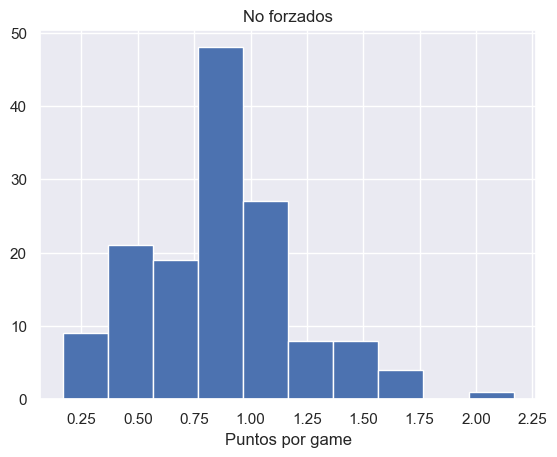

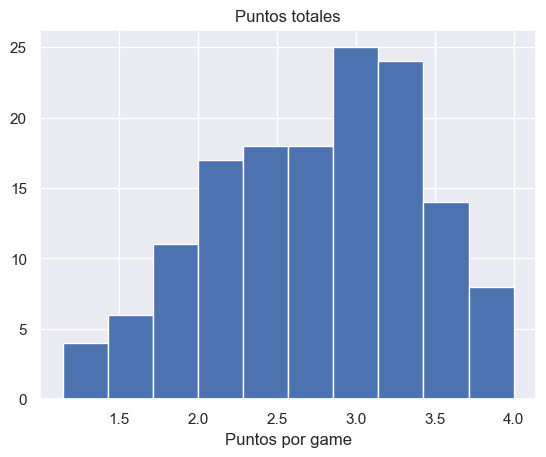

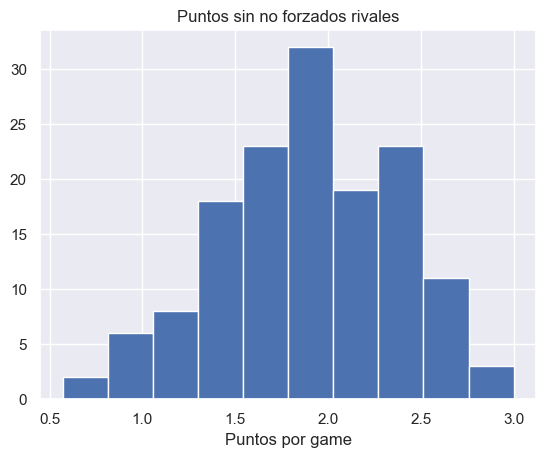

In [12]:
all_hist = all.drop("result", axis=1)
l_title = ["No forzados", "Puntos totales", "Puntos sin no forzados rivales"]
for i,g in enumerate(all_hist.columns):
    sns.set()
    plt.hist(all_hist[g])
    plt.xlabel("Puntos por game")
    plt.title(l_title[i])
    plt.show()

Las 3 tienen distribucion normal, aparentemente

In [14]:
df_corr = all.corr()
df_corr.drop(["nf","pto_tot","tot_snf"], axis=1)

,result
nf,-0.522001
pto_tot,0.789150
tot_snf,0.694979
result,1.000000


nf: errores no forzados,
pto_tot: puntos totales,
tot_snf: puntos totales sin contar errores no forzados del rival,
result: resultado, 1 es gana, 0 perder,

Hay una fuerte correlacion con result,(ganar) y los puntos que hace una pareja y los puntos totales con los puntos sin no forzados porque uno contiene al otro. Si bien se podría eliminar una de las columnas de los puntos, sirve tener las 2 columnas para diferenciar a los jugadores que hacen muchos puntos y tambien muchos errores no forzados de los que hacen muchos puntos y pocos errores no forzados, que son el ideal del padel y que mas sets ganan


Mientras que los errores no forzados muestran correlacion inversa con ganar, pero no tan fuerte
como la cantidad de puntos hechos, ya que los puntos pueden superar a los errores no forzados y ganar el partido, a pesar de tener ambos valores altos

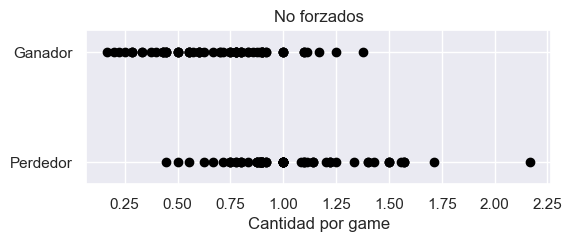

In [9]:
#errores no forzados 
plt.figure(figsize=(6, 2))
plt.scatter(all["nf"], all["result"], color="black")
plt.title("No forzados")
plt.yticks([0,1],["Perdedor","Ganador"])
plt.xlabel("Cantidad por game")
plt.margins(y=0.2)  # Ajusta el margen vertical

Se observa que hacer muy pocos errores no forzados (lo cual no es nada sencillo y suele ocurrrir cuando hay mucha diferencia en el ranking o una pareja en particular que son los numero 1 del ranking) es un buen predictor del triunfo del set.

Los errores no forzados tienen una correlacion con el resultado de: -0.522001, siendo que quien haga mas de 
estos tiene mas probabilidades de perder. Como se aprecia en el grafico, hay un rango de 0.47 a 1.35 puntos 
en los cuales se puede ganar o perder el set


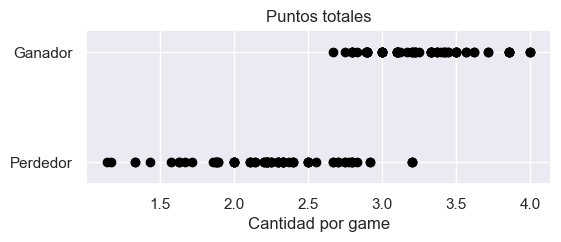

In [10]:
#Puntos totales 
plt.figure(figsize=(6, 2))
plt.scatter(all["pto_tot"], all["result"], color="black")
plt.title("Puntos totales")
plt.yticks([0,1],["Perdedor","Ganador"])
plt.xlabel("Cantidad por game")
plt.margins(y=0.2)  # Ajusta el margen vertical

En el grafico se puede apreciar a simple vista que los ganadores del set suelen hacer mas puntos por set
de promedio. Hay partidos muy parejos en los cuales los perdedores han hecho mas de 2.6 puntos por set. Se puede intuir que para ganar hay que promediar mas de 2.6 puntos por game

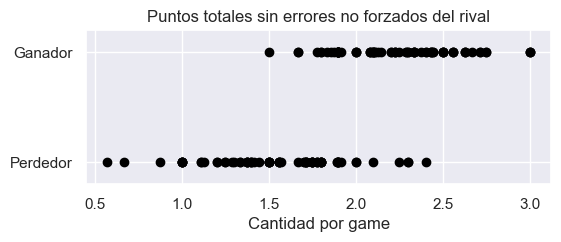

In [11]:
#Puntos totales sin errores no forzados del rival 
plt.figure(figsize=(6, 2))
plt.scatter(all["tot_snf"], all["result"], color="black")
plt.title("Puntos totales sin errores no forzados del rival")
plt.yticks([0,1],["Perdedor","Ganador"])
plt.xlabel("Cantidad por game")
plt.margins(y=0.2)  # Ajusta el margen vertical